In [13]:
import pandas as pd
import os

In [43]:
events=pd.read_json("../../simulation.jsonlines", orient="records",lines=True)
planes=pd.read_json("../../plans.jsonlines", orient="records",lines=True)
positions = pd.read_json("../../positions.jsonlines", orient="records", lines=True)

## LIMPIEZA

In [86]:
events = events.drop_duplicates()

In [101]:
positions.drop_duplicates()

TypeError: unhashable type: 'dict'

In [15]:
planes

,items,simulationId,trucks
0,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',..."
1,"[{'itemId': '0', 'locationId': '271c4e156a04e8...",a8a11526-6b9b-4143-bfb1-ffcae600a17e,"[{'items': ['62', '63', '69', '70', '71', '21'..."
2,"[{'itemId': '0', 'locationId': '6aa95e84c67637...",2f956e3a-25df-4c5e-bb50-92d92dc9ba00,"[{'items': ['79', '20', '21', '5', '76', '59',..."
3,"[{'itemId': '0', 'locationId': '0078f3bf6db092...",45c9a42a-7cb5-4266-b0aa-a05b3f446390,"[{'items': ['3', '4', '5', '6', '72', '11', '1..."
4,"[{'itemId': '0', 'locationId': '92e059821c9ca8...",864bd9f3-074d-45e8-a032-5a01237ae290,"[{'items': ['77', '78', '79', '16', '17', '91'..."
...,...,...,...
94,"[{'itemId': '0', 'locationId': '281ec8ac82cccd...",81acb266-ab82-497b-92d9-fae490cc4823,"[{'items': ['36', '37', '49', '6', '7', '8', '..."
95,"[{'itemId': '0', 'locationId': '950001b613cb58...",f007019f-866d-48be-a0cb-bd96328ee43b,"[{'items': ['46', '47', '48', '49', '40', '24'..."
96,"[{'itemId': '0', 'locationId': 'b40599012e4fba...",f0f90050-5a0f-4965-864e-d6bc0d02b5a0,"[{'items': ['16', '17', '42', '43', '44', '45'..."
97,"[{'itemId': '0', 'locationId': '074dc13529fd8b...",e33505ca-bfdb-496f-bcfd-b8b913a42637,"[{'items': ['62', '63', '64', '86', '10', '11'..."


## Tiempos de entrega

In [99]:
entregas.diff()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [73]:
entregas = events[events.eventType.isin(["Truck ended delivering", "Truck started delivering"])]
entregas = entregas.sort_values("eventType",ascending=True)
entregas = entregas.sort_values(by=["simulationId", "truckId", "eventTime"])

In [74]:
entregas["deliverTime"] = entregas["eventTime"].diff()
entregas = entregas[entregas.eventType == "Truck ended delivering"]
entregas

,eventDescription,eventTime,eventType,simulationId,truckId,deliverTime
13021,"Packet 78 to (calle del Poeta Blas de Otero, 2...",872250,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,120630.0
13112,"Packet 79 to (calle del Poeta Blas de Otero, 2...",992820,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,120570.0
13566,"Packet 50 to (calle de Valdecanillas, 59, Madr...",1536120,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0
13614,"Packet 51 to (calle de Valdecanillas, 59, Madr...",1596720,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0
13666,"Packet 52 to (calle de Valdecanillas, 59, Madr...",1657320,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0
...,...,...,...,...,...,...
11113,"Packet 42 to (calle de la Comunidad de Madrid,...",7565580,Truck ended delivering,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,60600.0
11176,"Packet 43 to (calle de la Comunidad de Madrid,...",7626180,Truck ended delivering,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,60570.0
11655,"Packet 79 to (calle San Andrés, 21, Majadahond...",8243580,Truck ended delivering,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,60600.0
11729,"Packet 80 to (calle San Andrés, 21, Majadahond...",8304180,Truck ended delivering,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,60600.0


In [75]:
events["eventType"].value_counts()

Truck started delivering    8567
Truck ended delivering      8567
Truck departed              3444
Truck arrived               3444
Truck initialized            640
Truck received packets       640
Truck departed to depot      640
Truck ended route            640
Name: eventType, dtype: int64

## Desanidar los planes

In [87]:
planes

,items,simulationId,trucks
0,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',..."
1,"[{'itemId': '0', 'locationId': '271c4e156a04e8...",a8a11526-6b9b-4143-bfb1-ffcae600a17e,"[{'items': ['62', '63', '69', '70', '71', '21'..."
2,"[{'itemId': '0', 'locationId': '6aa95e84c67637...",2f956e3a-25df-4c5e-bb50-92d92dc9ba00,"[{'items': ['79', '20', '21', '5', '76', '59',..."
3,"[{'itemId': '0', 'locationId': '0078f3bf6db092...",45c9a42a-7cb5-4266-b0aa-a05b3f446390,"[{'items': ['3', '4', '5', '6', '72', '11', '1..."
4,"[{'itemId': '0', 'locationId': '92e059821c9ca8...",864bd9f3-074d-45e8-a032-5a01237ae290,"[{'items': ['77', '78', '79', '16', '17', '91'..."
...,...,...,...
94,"[{'itemId': '0', 'locationId': '281ec8ac82cccd...",81acb266-ab82-497b-92d9-fae490cc4823,"[{'items': ['36', '37', '49', '6', '7', '8', '..."
95,"[{'itemId': '0', 'locationId': '950001b613cb58...",f007019f-866d-48be-a0cb-bd96328ee43b,"[{'items': ['46', '47', '48', '49', '40', '24'..."
96,"[{'itemId': '0', 'locationId': 'b40599012e4fba...",f0f90050-5a0f-4965-864e-d6bc0d02b5a0,"[{'items': ['16', '17', '42', '43', '44', '45'..."
97,"[{'itemId': '0', 'locationId': '074dc13529fd8b...",e33505ca-bfdb-496f-bcfd-b8b913a42637,"[{'items': ['62', '63', '64', '86', '10', '11'..."


In [88]:
pd.DataFrame(planes.trucks[0])

,items,route,truck_id
0,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH
1,"[74, 75, 76, 67, 68, 69, 70, 92, 93, 94, 55, 5...","[{'destination': 'faf06210580833f8c7963506', '...",2423VRT
2,"[18, 19, 57, 58, 88, 89, 90, 91, 54, 20, 21, 2...","[{'destination': 'bef2df0471ee1c26b4ab6ba9', '...",0265TYL
3,"[87, 0, 1, 2, 3, 33, 95, 96, 97]","[{'destination': '7a249403ad22a72495769f75', '...",8809GPH
4,"[31, 32, 37, 38, 39, 66]","[{'destination': '1e38734ff239ccf75bf04b95', '...",1161GJN
5,[86],"[{'destination': '7d1544d169eeeb1d917e9f02', '...",1669HSZ
6,"[77, 78, 79, 52, 53, 29, 30, 80, 81, 82, 34, 3...","[{'destination': '166c008321c564cf6c885cb2', '...",3321FBL


In [89]:
pd.DataFrame(pd.DataFrame(planes.trucks[0]).route[0])

,destination,duration,origin
0,af3ea5c0e98151a51bd39c64,197,ce6feed06bc1a9e5aff95f04
1,c0430d1e19c34a06e343a270,733,af3ea5c0e98151a51bd39c64
2,b31f6bb5c55435cb5495a62b,380,c0430d1e19c34a06e343a270
3,58a50ddf91095c052e330fd6,612,b31f6bb5c55435cb5495a62b
4,910cd4ad38bc68ff7abdd941,850,58a50ddf91095c052e330fd6
5,49a09d201cc830dc1c4e87fc,241,910cd4ad38bc68ff7abdd941
6,324beca4107779629830c6d3,689,49a09d201cc830dc1c4e87fc
7,123039c250dd5a3e7c3e4fc8,187,324beca4107779629830c6d3
8,5a13a4517d5fc3018de2dbea,1203,123039c250dd5a3e7c3e4fc8
9,ce6feed06bc1a9e5aff95f04,99,5a13a4517d5fc3018de2dbea


In [90]:
planes_desanidado = planes.join(planes.trucks.explode().apply(pd.Series), lsuffix='_planes').reset_index(drop=True)
planes_desanidado

,items_planes,simulationId,trucks,items,route,truck_id
0,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH
1,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[74, 75, 76, 67, 68, 69, 70, 92, 93, 94, 55, 5...","[{'destination': 'faf06210580833f8c7963506', '...",2423VRT
2,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[18, 19, 57, 58, 88, 89, 90, 91, 54, 20, 21, 2...","[{'destination': 'bef2df0471ee1c26b4ab6ba9', '...",0265TYL
3,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[87, 0, 1, 2, 3, 33, 95, 96, 97]","[{'destination': '7a249403ad22a72495769f75', '...",8809GPH
4,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[31, 32, 37, 38, 39, 66]","[{'destination': '1e38734ff239ccf75bf04b95', '...",1161GJN
...,...,...,...,...,...,...
635,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[53, 54, 55, 83, 84, 85, 86, 26, 27, 29, 30, 3...","[{'destination': '225cd814768e8ca390983313', '...",5534TPH
636,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[72, 73, 74, 88, 89, 90, 91, 43, 62, 63, 64, 3...","[{'destination': '417bf3aae83127cd905f3bc9', '...",3953RLD
637,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[6, 7, 8, 9]","[{'destination': '1e1251e186dd507f63e4d1e6', '...",5030LXK
638,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[44, 45, 46, 47, 94, 20, 21, 22, 95, 96, 97, 6...","[{'destination': '6a33d0bcd3624ccb86febf09', '...",3321FBL


In [95]:
planes_desanidado_x2 = planes_desanidado.join(planes_desanidado.route.explode().apply(pd.Series)).reset_index(drop=True)
planes_desanidado_x2[['simulationId', 'truck_id', 'origin', 'destination', 'duration']]

,simulationId,truck_id,origin,destination,duration
0,a2bfd344-3b14-462a-82e7-d42aca54a650,5534TPH,ce6feed06bc1a9e5aff95f04,af3ea5c0e98151a51bd39c64,197
1,a2bfd344-3b14-462a-82e7-d42aca54a650,5534TPH,af3ea5c0e98151a51bd39c64,c0430d1e19c34a06e343a270,733
2,a2bfd344-3b14-462a-82e7-d42aca54a650,5534TPH,c0430d1e19c34a06e343a270,b31f6bb5c55435cb5495a62b,380
3,a2bfd344-3b14-462a-82e7-d42aca54a650,5534TPH,b31f6bb5c55435cb5495a62b,58a50ddf91095c052e330fd6,612
4,a2bfd344-3b14-462a-82e7-d42aca54a650,5534TPH,58a50ddf91095c052e330fd6,910cd4ad38bc68ff7abdd941,850
...,...,...,...,...,...
4079,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,6270NFM,20ee036e147b4a1bd5af0e1c,5bec37aee4796cc965e71c88,1173
4080,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,6270NFM,5bec37aee4796cc965e71c88,1f183bd64aa5bfae47843de5,1198
4081,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,6270NFM,1f183bd64aa5bfae47843de5,4551fdc303a5ddafa1dcf28c,1133
4082,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,6270NFM,4551fdc303a5ddafa1dcf28c,2884f6b369dc20f3051a216d,804


In [92]:
planes_desanidado_x2.sort_values(by=["simulationId", "truck_id"], inplace=True)

In [96]:
planes_desanidado_x2

,items_planes,simulationId,trucks,items,route,truck_id,destination,duration,origin
0,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,af3ea5c0e98151a51bd39c64,197,ce6feed06bc1a9e5aff95f04
1,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,c0430d1e19c34a06e343a270,733,af3ea5c0e98151a51bd39c64
2,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,b31f6bb5c55435cb5495a62b,380,c0430d1e19c34a06e343a270
3,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,58a50ddf91095c052e330fd6,612,b31f6bb5c55435cb5495a62b
4,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,910cd4ad38bc68ff7abdd941,850,58a50ddf91095c052e330fd6
...,...,...,...,...,...,...,...,...,...
4079,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,5bec37aee4796cc965e71c88,1173,20ee036e147b4a1bd5af0e1c
4080,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,1f183bd64aa5bfae47843de5,1198,5bec37aee4796cc965e71c88
4081,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,4551fdc303a5ddafa1dcf28c,1133,1f183bd64aa5bfae47843de5
4082,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,2884f6b369dc20f3051a216d,804,4551fdc303a5ddafa1dcf28c


### EDA

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\carlo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Limpieza

In [62]:
# Cargar los archivos JSONLines
events = pd.read_json("../../simulation.jsonlines", orient="records", lines=True)
planes = pd.read_json("../../plans.jsonlines", orient="records", lines=True)
positions = pd.read_json("../../positions.jsonlines", orient="records", lines=True)

In [64]:
# Limpieza de datos: eliminar duplicados y valores nulos
for df in [events, planes, positions]:
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)


TypeError: unhashable type: 'list'

In [52]:
## Eliminar valores nulos
events.dropna(inplace=True)
planes.dropna(inplace=True)
positions.dropna(inplace=True)

In [65]:
# Conversión de tipos de datos
if "eventTime" in events.columns:
    events["eventTime"] = pd.to_numeric(events["eventTime"], errors='coerce')

In [76]:
# Análisis exploratorio de datos (EDA)
print("Resumen estadístico de eventos:")
print(events.describe())
print("\nResumen estadístico de planes:")
print(planes_desanidado_x2.describe())
print("\nResumen estadístico de posiciones:")
print(positions.describe())

Resumen estadístico de eventos:
          eventTime
count  2.658200e+04
mean   3.883899e+06
std    2.738211e+06
min    0.000000e+00
25%    1.647098e+06
50%    3.534780e+06
75%    5.728642e+06
max    1.568325e+07

Resumen estadístico de planes:
          duration
count  4084.000000
mean    839.940744
std     802.391922
min      21.000000
25%     311.000000
50%     580.000000
75%    1065.000000
max    5442.000000

Resumen estadístico de posiciones:
          eventTime
count  6.968500e+04
mean   4.069258e+06
std    2.697518e+06
min    3.900000e+02
25%    1.840590e+06
50%    3.797430e+06
75%    5.907570e+06
max    1.568172e+07


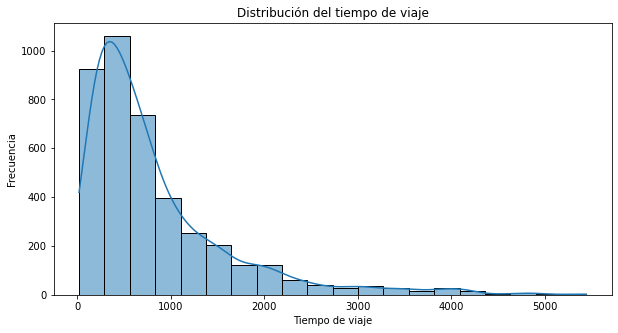

In [77]:
# Visualización de distribuciones clave
plt.figure(figsize=(10,5))
sns.histplot(planes_desanidado_x2['duration'], bins=20, kde=True)
plt.title("Distribución del tiempo de viaje")
plt.xlabel("Tiempo de viaje")
plt.ylabel("Frecuencia")
plt.show()

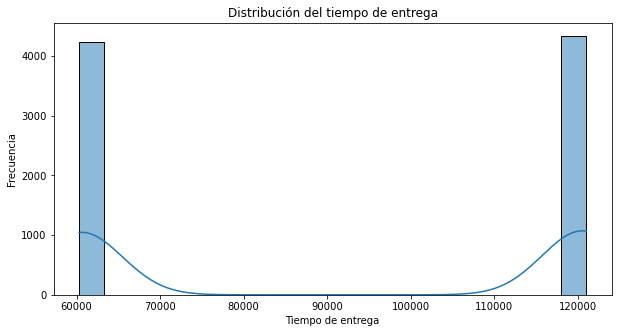

In [78]:
plt.figure(figsize=(10,5))
sns.histplot(entregas['deliverTime'], bins=20, kde=True)
plt.title("Distribución del tiempo de entrega")
plt.xlabel("Tiempo de entrega")
plt.ylabel("Frecuencia")
plt.show()

In [56]:
## Convertir tipos de datos si es necesario
if 'tiempo_viaje' in planes.columns:
    planes['tiempo_viaje'] = pd.to_numeric(plan['tiempo_viaje'], errors='coerce')
if 'tiempo_entrega' in planes.columns:
    planes['tiempo_entrega'] = pd.to_numeric(plan['tiempo_entrega'], errors='coerce')

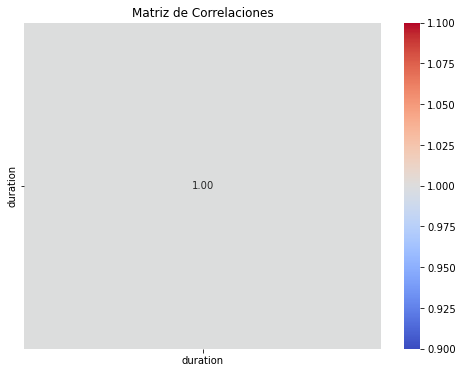

In [79]:
# Análisis de correlaciones
correlation_matrix = planes_desanidado_x2.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

In [81]:
# Número de paquetes recibidos por cada localización
if "destination" in planes_desanidado_x2.columns:
    paquetes_por_localizacion = planes_desanidado_x2.groupby('destination')['truck_id'].count()
    print("\nNúmero de paquetes recibidos por cada localización:")
    print(paquetes_por_localizacion)
else:
    print("Error: 'destination' no encontrada en planes_desanidado_x2.")


Número de paquetes recibidos por cada localización:
destination
0078f3bf6db09213f4af0f0b    3
00ff35c9e139e54ac2cd8d5d    3
0109fc10152c17acb1b7385e    1
010a38206989928048905335    2
019899f48d82e0607d27aed2    2
                           ..
ffa5f7ccb8bc3bafabdb1135    2
ffcf4e1b98451c0a06931a47    1
ffd8dc57f22920723c82bc01    1
ffe1940618db72629fba0bb6    2
fff05cef104e52f22448f283    1
Name: truck_id, Length: 1994, dtype: int64


In [82]:
# Número de paquetes transportados en total por cada camión
if "truck_id" in planes_desanidado_x2.columns:
    paquetes_por_camion = planes_desanidado_x2.groupby('truck_id')['destination'].count()
    print("\nNúmero de paquetes transportados en total por cada camión:")
    print(paquetes_por_camion)
else:
    print("Error: 'truck_id' no encontrada en planes_desanidado_x2.")



Número de paquetes transportados en total por cada camión:
truck_id
0013DYS    279
0184WLX      4
0265TYL     28
0781PZL    111
1012GWV      3
1161GJN      4
1489WHW      8
1669HSZ     22
2423VRT     61
3321FBL    709
3953RLD    605
5030LXK    424
5534TPH    766
6270NFM    440
6965XLY    192
8327DZH     12
8386WZB    143
8809GPH     34
9593DXM    239
Name: destination, dtype: int64


In [83]:
# Número de localizaciones distintas visitadas por cada camión
locaciones_por_camion = planes_desanidado_x2.groupby('truck_id')['destination'].nunique()
print("\nNúmero de localizaciones distintas visitadas por cada camión:")
print(locaciones_por_camion)


Número de localizaciones distintas visitadas por cada camión:
truck_id
0013DYS    220
0184WLX      4
0265TYL     23
0781PZL     88
1012GWV      3
1161GJN      4
1489WHW      6
1669HSZ     18
2423VRT     46
3321FBL    541
3953RLD    477
5030LXK    333
5534TPH    603
6270NFM    351
6965XLY    146
8327DZH     11
8386WZB    108
8809GPH     27
9593DXM    171
Name: destination, dtype: int64


In [84]:
# Distribución del número de eventos de cada tipo
if "eventType" in events.columns:
    eventos_distribucion = events['eventType'].value_counts()
    print("\nDistribución del número de eventos de cada tipo:")
    print(eventos_distribucion)
else:
    print("Error: 'eventType' no encontrada en events.")


Distribución del número de eventos de cada tipo:
Truck started delivering    8567
Truck ended delivering      8567
Truck departed              3444
Truck arrived               3444
Truck initialized            640
Truck received packets       640
Truck departed to depot      640
Truck ended route            640
Name: eventType, dtype: int64


In [85]:
# Número de paquetes que lleva cada camión en cada viaje
if "simulationId" in planes_desanidado_x2.columns:
    paquetes_por_viaje = planes_desanidado_x2.groupby(['truck_id', 'simulationId'])['destination'].count()
    print("\nNúmero de paquetes que lleva cada camión en cada viaje:")
    print(paquetes_por_viaje)
else:
    print("Error: 'simulationId' no encontrada en planes_desanidado_x2.")



Número de paquetes que lleva cada camión en cada viaje:
truck_id  simulationId                        
0013DYS   04e06e2f-d6d4-4364-aedc-d3f98fa1017a    7
          0a0705b9-6b0f-4a69-b25b-668b596041c4    7
          0f8f5823-99dc-4511-9951-c9f6b4c8696e    2
          173ebd26-a1a9-4798-a4a0-f2b5f763dcae    8
          1a73cac3-f12d-4e06-a215-c69c2a6ea856    6
                                                 ..
9593DXM   f34001bf-670e-48ef-b706-535637ee7818    7
          f5532e53-1b55-4412-aa91-aed76c9ab80f    6
          fa23dac3-ff27-474b-8e67-cf65128b6afe    7
          fb468da5-c4f2-41b2-b1b5-d91f3646601f    4
          fccbc861-3e31-4e35-b4f3-b0f97e77a2c2    2
Name: destination, Length: 640, dtype: int64


In [26]:
print("Resumen estadístico de las duraciones de viaje:")
print(planes_desanidado_x2['duration'].describe())


Resumen estadístico de las duraciones de viaje:
count    4084.000000
mean      839.940744
std       802.391922
min        21.000000
25%       311.000000
50%       580.000000
75%      1065.000000
max      5442.000000
Name: duration, dtype: float64


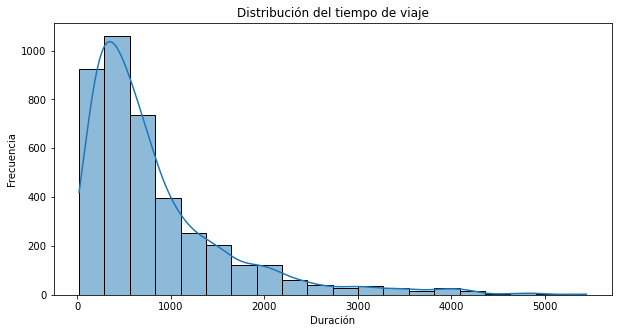

In [31]:
# Visualización de distribuciones
plt.figure(figsize=(10,5))
sns.histplot(planes_desanidado_x2['duration'], bins=20, kde=True)
plt.title("Distribución del tiempo de viaje")
plt.xlabel("Duración")
plt.ylabel("Frecuencia")
plt.show()

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(planes_desanidado_x2['tiempo_entrega'], bins=20, kde=True)
plt.title("Distribución del tiempo de entrega")
plt.xlabel("Tiempo de entrega")
plt.ylabel("Frecuencia")
plt.show()

KeyError: 'tiempo_entrega'

<Figure size 720x360 with 0 Axes>

In [32]:
# Localización más visitada
loc_mas_visitada = events['location'].value_counts().idxmax()
print(f"La localización más visitada es: {loc_mas_visitada}")


KeyError: 'location'

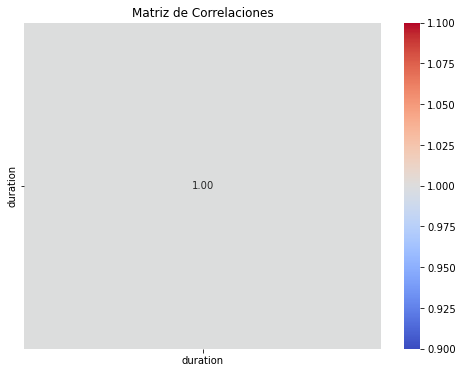

In [61]:
# Análisis de correlaciones
correlation_matrix = planes_desanidado_x2.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

In [38]:
# Número de paquetes recibidos por cada localización
paquetes_por_localizacion = planes_desanidado.groupby('destination')['packages'].sum()
print("\nNúmero de paquetes recibidos por cada localización:")
print(paquetes_por_localizacion)

KeyError: 'destination'

In [37]:

# Número de paquetes transportados en total por cada camión
paquetes_por_camion = planes_desanidado.groupby('truck_id')['packages'].sum()
print("\nNúmero de paquetes transportados en total por cada camión:")
print(paquetes_por_camion)

KeyError: 'Column not found: packages'

In [39]:
# Número de localizaciones distintas visitadas por cada camión
locaciones_por_camion = planes_desanidado_x2.groupby('truck_id')['destination'].nunique()
print("\nNúmero de localizaciones distintas visitadas por cada camión:")
print(locaciones_por_camion)


Número de localizaciones distintas visitadas por cada camión:
truck_id
0013DYS    220
0184WLX      4
0265TYL     23
0781PZL     88
1012GWV      3
1161GJN      4
1489WHW      6
1669HSZ     18
2423VRT     46
3321FBL    541
3953RLD    477
5030LXK    333
5534TPH    603
6270NFM    351
6965XLY    146
8327DZH     11
8386WZB    108
8809GPH     27
9593DXM    171
Name: destination, dtype: int64


In [40]:
# Distribución del número de eventos de cada tipo
eventos_distribucion = events['eventType'].value_counts()
print("\nDistribución del número de eventos de cada tipo:")
print(eventos_distribucion)


Distribución del número de eventos de cada tipo:
Truck started delivering    8567
Truck ended delivering      8567
Truck departed              3444
Truck arrived               3444
Truck initialized            640
Truck received packets       640
Truck departed to depot      640
Truck ended route            640
Name: eventType, dtype: int64


In [41]:
# Número de paquetes que lleva cada camión en cada viaje
paquetes_por_viaje = planes_desanidado_x2.groupby(['truck_id', 'destination'])['packages'].sum()
print("\nNúmero de paquetes que lleva cada camión en cada viaje:")
print(paquetes_por_viaje)


KeyError: 'Column not found: packages'